#**Activity 2**

###**Master’s in Applied Artificial Intelligence**
###**Course: Artificial Intelligence and Machine Learning**
####**Tecnológico de Monterrey**
#####**Prof. Luis Eduardo Falcón Morales**


###**Student name: Mario Alberto Guillen De La Torre**

###**Enrollment number: A01796701**

**NOTES:**
*   This activity consists of only three exercises, divided in three parts.
*   **The only modified parts are the ones marked so.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [5]:
# We load the file onto our environment:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Exercise - 1: Pearson Correlation Matrix**

**QUESTIONS:**
- **Question 1.1.** Investigate the importance of Pearson’s correlation coefficient and how it can be used during data analysis in a problem.
- **Question 1.2.** For what type of variables can Pearson’s correlation coefficient be applied?
- **Question 1.3.** Display the correlation matrix of the variables in the "misdatos" dataframe, including the numerical correlation value for each pair of variables in every cell of the matrix. When displaying the correlation matrix, you should also use the heatmap option from the Seaborn library, applying the ‘BuGn’ colormap.

You can consult the following documentation:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


### **Answers:**

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++ Start section to add text ++++++++++++++++++++++++++

* **Answer 1.1.**
Pearson’s correlation coefficient is a value that indicates the strength and direction of a linear relationship between two attributes. It ranges from 1 (perfect positive correlation) to -1 (perfect negative correlation). This metric is crucial for identifying significant relationships among the attributes in our dataset, aiding in informed decision-making.
During data analysis, it can be used to detect collinearity and relevant relationships among attributes.

* **Answer 1.2.**
Pearson’s correlation coefficient can be applied to numerical variables. However, it is important to consider that:
** Pearson’s method assumes that the relationship between the analyzed variables is linear.
** The distributions of the variables should be approximately normal.


++++++++ End section to add text ++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

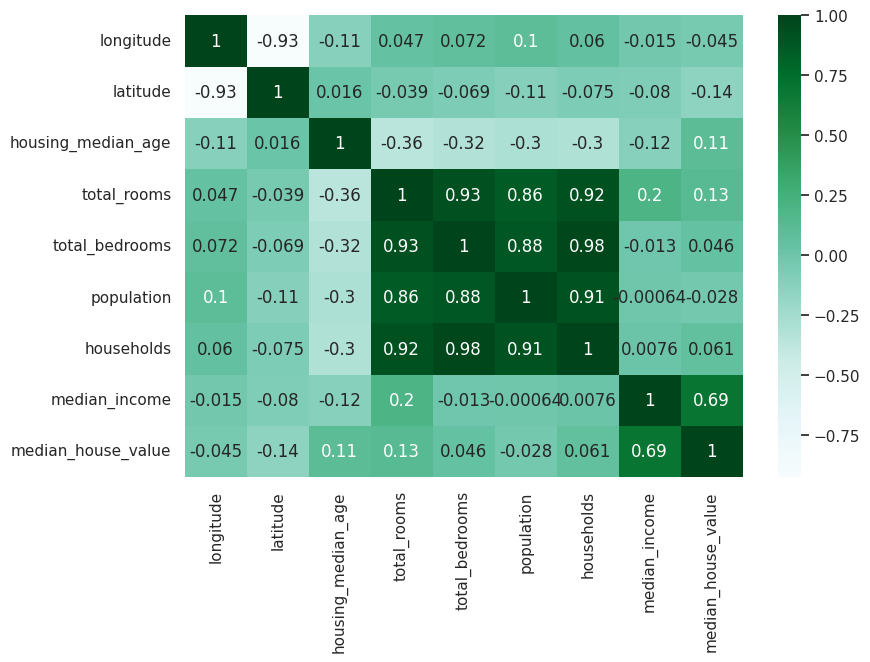

In [6]:
sns.set(rc={'figure.figsize':(9,6)})

#########################################################################
# THE SECTION TO ADD CODE STARTS.
# Answer 1.3.

# Replace "None" with your lines of code within this region.
# At most, 2 lines of code are expected.

corMap = misdatos.corr(method='pearson', min_periods=1)
sns.heatmap(data = corMap, cmap = 'BuGn',annot = True)

# THE SECTION TO ADD CODE ENDS.
#########################################################################

plt.show()

#**Exercise - 2: Transformations and Histograms of Variables**

**INSTRUCTIONS:**

In this exercise, you will work only with the following 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

Each of these variables should undergo the following transformations, and their histograms should be displayed with 20 bins:

* Square root transformation using NumPy.
* Natural logarithm transformation using NumPy.
* Power of 2 (i.e., squared) transformation using NumPy.
* Research and apply the Box-Cox transformation using scikit-learn.



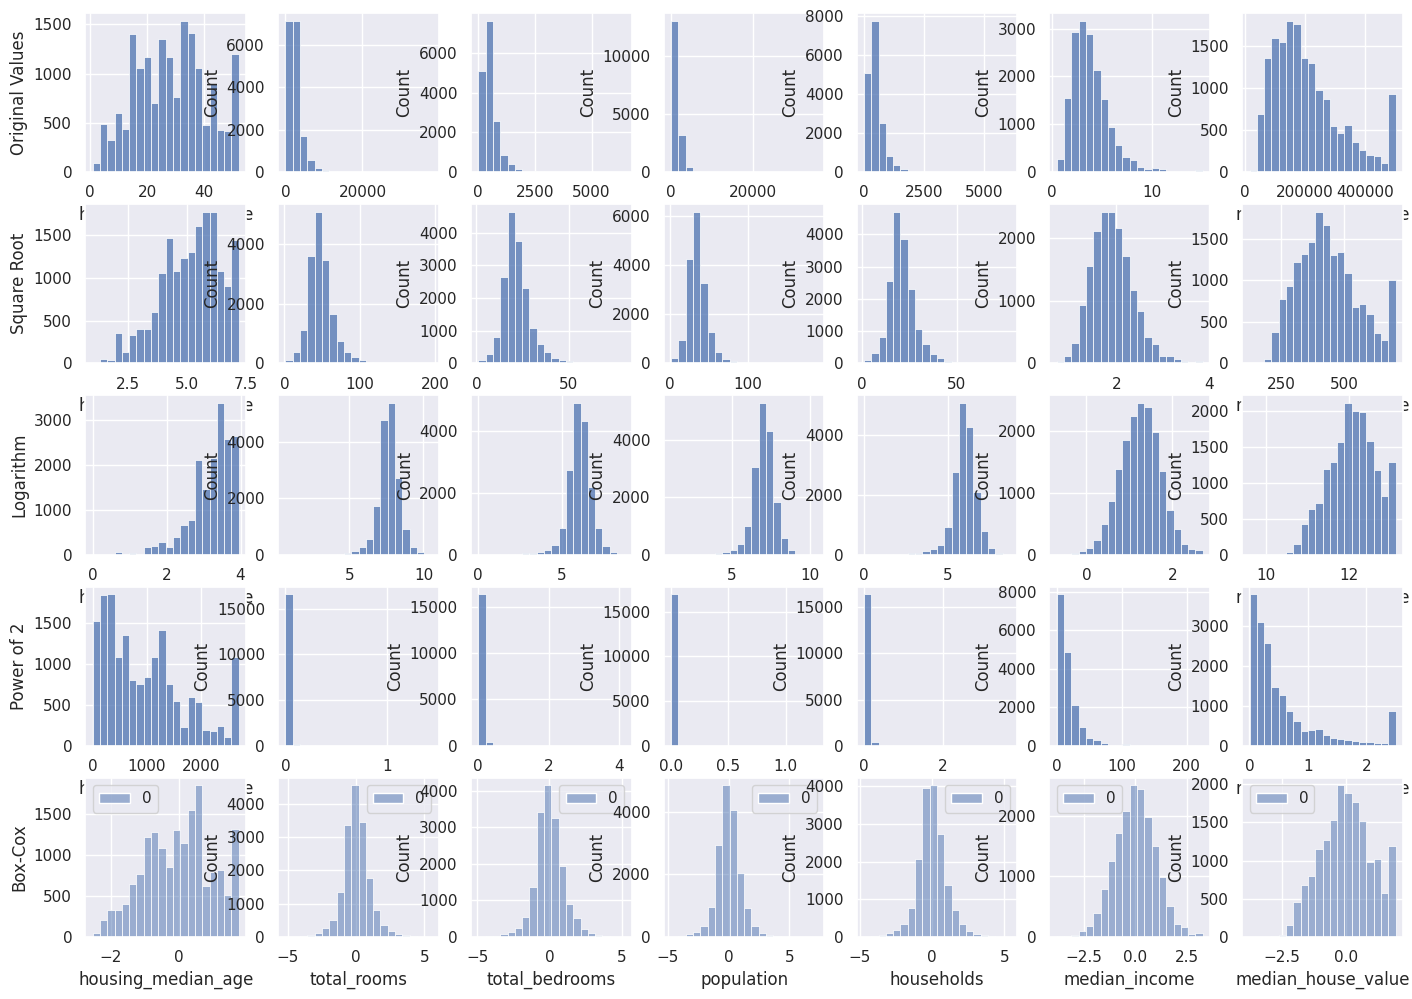

In [7]:
# List of the names of the 7 variables we will work with in this exercise.
variables_a_transformar = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    ################################################################################################################
    # THE SECTION TO ADD CODE STARTS.
    # Exercise 2
    # You should only write your code in the parts that say "None," replacing this with your code.
    # You must use the dataframe "misdatos" along with the list called "variables_a_transformar"
    # to select the values of each of the 7 variables that will be transformed and plotted.


    #  Original Data ---------------------------------------------------------
    plt.subplot(5,7,k+1)

    Transf0 = misdatos[variables_a_transformar[k]]          #  In this line, Transf0 should be assigned the values of each variable "k" without transformation.

    sns.histplot(data = Transf0, bins = 20)                 #  In this line, we add the command to generate the histogram of Transf0 with 20 bins.



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Original Values')



    #  Data transformed with square root ------------------------------------
    plt.subplot(5,7,k+8)

    Transf1 = np.sqrt(misdatos[variables_a_transformar[k]])   #  In this line, the square root should be applied to the values of each untransformed variable "k".

    sns.histplot(data = Transf1, bins = 20)                   #  In this line, add the command to generate the histogram of Transf1 with 20 bins.



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Square Root')



    #  Data transformed with natural logarithm --------------------------------
    plt.subplot(5,7,k+15)

    Transf2 = np.log(misdatos[variables_a_transformar[k]])     #  In this line, the natural logarithm should be applied to the values of each untransformed variable "k".

    sns.histplot(data = Transf2, bins = 20)                    #  In this line, add the command to generate the histogram of Transf2 with 20 bins.


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logarithm')



    # Data transformed to the power of 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.power(misdatos[variables_a_transformar[k]],2)  #  In this line, you must square the values of each untransformed variable "k".

    sns.histplot(data = Transf3, bins = 20)                     # In this line, add the command to generate the histogram of Transf3 with 20 bins.



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Power of 2')


    # Data transformed with Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(X= misdatos[variables_a_transformar[k]].to_frame() ,method= 'box-cox')       #  In this line, the Box-Cox transformation should be applied to the values of each untransformed variable "k".

    sns.histplot(data = Transf4, bins = 20)                    #  In this line, add the command to generate the histogram of Transf4 with 20 bins.



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # THE SECTION TO ADD CODE ENDS.
    ################################################################################################################



plt.show()

#**Exercise - 3 - Performance Metrics: $RMSE$, $MAE$, and $MAPE$**


**INSTRUCTIONS:**

In the file "MNA_IAyAA_week_2_RLM_basic_theory_2024.pdf", available on Canvas, you will find the formulas that define the metrics $RMSE$, $MAE$, and $MAPE$.

Investigate the meaning of each of these metrics. Each one can be calculated using the actual observed values $y$, the predicted values $\hat{y}$, and the total number of records $n$.

In this exercise, you must define each of these metrics using three functions, named mi_RMSE, mi_MAE, and mi_MAPE.

Each of these functions must have two arguments:
- The actual observed values $y$
- The predicted values $\hat{y}$

The return value of each function should be the numerical result given by the corresponding formula.

You may only use NumPy functions for mean (mean), square (square), and absolute value (abs), along with basic arithmetic operations.
Each function is expected to be defined in at most five lines of code—though fewer lines are acceptable.

Any excess beyond this limit will be penalized.



In [8]:
#########################################################################
# THE SECTION TO ADD CODE STARTS.
# Exercise 3

# Include here the lines of code that define the function mi_RMSE:
def mi_RMSE(y,y_):
  return np.sqrt(np.mean(np.power(y - y_,2)))

# Include here the lines of code that define the function mi_MAE:
def mi_MAE(y,y_):
  return np.mean(np.abs(y - y_))

# Include here the lines of code that define the function mi_MAPE:
def mi_MAPE(y,y_):
  return np.mean(np.abs((y - y_)/y)) * 100

# THE SECTION TO ADD CODE ENDS.
#########################################################################



In [9]:
Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')



modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)


  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Display information:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  68204.5 		50000.3  		30.4%
fold[2]:  72072.6 		51628.1  		31.1%
fold[3]:  67346.6 		50060.5  		29.6%
fold[4]:  67909.0 		49890.9  		30.3%
fold[5]:  72075.5 		53219.4  		30.8%
fold[6]:  69394.4 		51815.7  		30.5%
fold[7]:  72121.0 		51689.5  		31.9%
fold[8]:  68174.0 		50171.6  		28.9%
fold[9]:  67533.0 		49247.2  		29.8%
fold[10]:  65581.0 		49079.2  		28.9%
mean(std) 69041.2(2187.7)  	50680.2(1264.8)   	30.2% (0.9)


**\<\<End of Activity_1_Week_2>>**